# Лабораторная работа №5. 
## Логинов Сергей
### Вариант 28

1. Считаем из заданного набора данных (Hepatitis Data Set) репозитария UCI значения трех признаков (ALK PHOSPHATE, ALBUMIN, PROTIME) и метки класса (HISTOLOGY).

In [1]:
import pandas as pd
url = \
"https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data"
data_set = pd.read_csv( url, header=None )
data_set = data_set[[15,17,18,19]]
data_set = data_set.rename(columns={15: "ALK PHOSPHATE", 17:"ALBUMIN", 18: "PROTIME", 19: "HISTOLOGY"})
data_set

,ALK PHOSPHATE,ALBUMIN,PROTIME,HISTOLOGY
0,85,4.0,?,1
1,135,3.5,?,1
2,96,4.0,?,1
3,46,4.0,80,1
4,?,4.0,?,1
...,...,...,...,...
150,?,3.3,50,2
151,126,4.3,?,2
152,75,4.1,?,2
153,81,4.1,48,2


2. Произведем препроцессинг данных.

In [2]:
import numpy as np
data_set["HISTOLOGY"] = data_set["HISTOLOGY"].dropna()
data_set = data_set.replace('?',np.NaN)
for i in data_set:
    if data_set[i].dtype == "object":
        data_set[i] = pd.to_numeric(data_set[i])
    column_tmp  = data_set[i]
    column_tmp = column_tmp.fillna(column_tmp.mean())
    data_set[i] = column_tmp

In [3]:
data_set

,ALK PHOSPHATE,ALBUMIN,PROTIME,HISTOLOGY
0,85.000000,4.0,61.852273,1
1,135.000000,3.5,61.852273,1
2,96.000000,4.0,61.852273,1
3,46.000000,4.0,80.000000,1
4,105.325397,4.0,61.852273,1
...,...,...,...,...
150,105.325397,3.3,50.000000,2
151,126.000000,4.3,61.852273,2
152,75.000000,4.1,61.852273,2
153,81.000000,4.1,48.000000,2


3. Масштабируем признаки набора данных на интервал от 0 до 1.

In [4]:
pd.options.mode.chained_assignment = None 
data_set["ALBUMIN"].max()
for i in data_set:
    if i == "HISTOLOGY":
        break
    min_val = data_set[i].min()
    max_val = data_set[i].max()
    for j in range(len(data_set[i])):
        val = (data_set[i][j] - min_val) / (max_val - min_val)
        data_set[i][j] = val
data_set

,ALK PHOSPHATE,ALBUMIN,PROTIME,HISTOLOGY
0,0.219331,0.441860,0.618523,1
1,0.405204,0.325581,0.618523,1
2,0.260223,0.441860,0.618523,1
3,0.074349,0.441860,0.800000,1
4,0.294890,0.441860,0.618523,1
...,...,...,...,...
150,0.294890,0.279070,0.500000,2
151,0.371747,0.511628,0.618523,2
152,0.182156,0.465116,0.618523,2
153,0.204461,0.465116,0.480000,2


4. Визуализируем набор данных в виде точек пространства с координатами, соответствующими трем признакам, отображая точки различных классов разными цветами. Подпишем оси и рисунок, создадим легенду набора данных.

In [5]:
# todo
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
def data_visualize(X, y):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    xs = X.iloc[:, 0]
    ys = X.iloc[:, 1]
    zs = X.iloc[:, 2]
    colors = y
    ax.scatter( xs, ys, zs, c=colors, s=25 )
    ax.set_xlabel(xs.name)
    ax.set_ylabel(ys.name)
    ax.set_zlabel(zs.name)
    fig.set_dpi(250)
    plt.show()

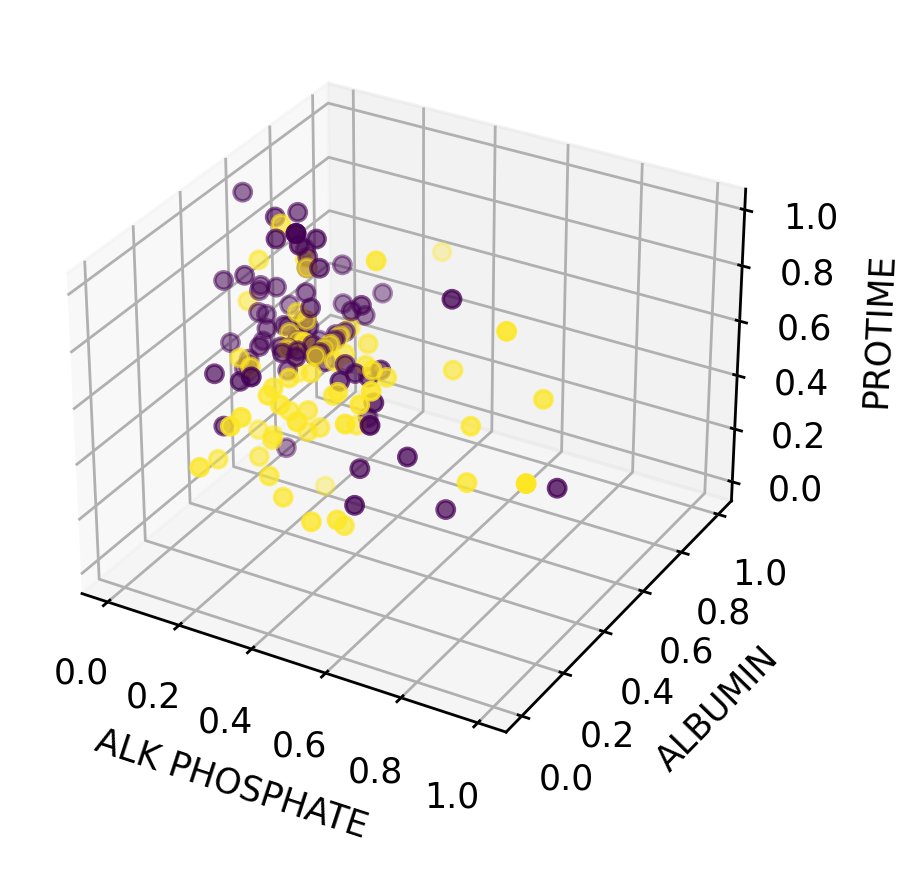

In [6]:
X = data_set.drop('HISTOLOGY',axis=1)
y = data_set['HISTOLOGY']
data_visualize(X,y)

5. Используя разделение набора данных из трех признаков на обучающую и тестовую выборки в соотношении 75% на 25%, проведем классификацию тестовой выборки с помощью наивного байесовского классификатора.

In [7]:
from sklearn.model_selection import train_test_split
test_size=0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [8]:
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit(X_train,y_train);

6.  Построим и выведем на экран отчет о классификации и матрицу ошибок.

In [9]:
from sklearn.metrics import classification_report
y_pred = nbc.predict(X_test)
print("Отчет о классификации:\n")
print(classification_report(y_test,y_pred))

Отчет о классификации:

              precision    recall  f1-score   support

           1       0.68      0.77      0.72        22
           2       0.64      0.53      0.58        17

    accuracy                           0.67        39
   macro avg       0.66      0.65      0.65        39
weighted avg       0.66      0.67      0.66        39



In [10]:
import pandas as pd
from sklearn.metrics import confusion_matrix
cm = (confusion_matrix(y_test,y_pred))
cmdf = pd.DataFrame(cm,index=['Класс 1',' Класс 2'], columns=['Класс 1','Класс 2'])
print("Матрица ошибок:\n")
cmdf

Матрица ошибок:



,Класс 1,Класс 2
Класс 1,17,5
Класс 2,8,9


7. Найдем точность классификации набора данных при помощи наивного байесовского классификатора методом кросс-валидации по 5 блокам.

In [11]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 5
kfold = KFold(n_splits=num_folds)
results = cross_val_score(nbc, X, y, cv=kfold)
nbc_acc = results.mean()*100.0
print("Точность: {:.3f} ({:.3f})".format(nbc_acc, results.std()*100.0))

Точность: 60.000 (23.136)


8. Используя разделение набора данных из трех признаков на обучающую и тестовую выборки в соотношении 75% на 25%, проведем классификацию тестовой выборки с помощью метода К ближайших соседей для различных значений К и определим оптимальное значение параметра К с минимальной долей ошибок.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []
for k in range(1, 11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    pred_i = knn_clf.predict(X_test)
    score = np.mean(pred_i != y_test)
    error_rate.append(np.mean(pred_i != y_test))

best_k = error_rate.index(min(error_rate)) + 1
print("Лучшее k с минимальной долей ошибок =", best_k)

Лучшее k с минимальной долей ошибок = 6


9. Найдем точность классификации набора данных при помощи метода К ближайших соседей для найденного значения К методом кросс-валидации по 5 блокам.

In [13]:
knn_clf = KNeighborsClassifier(n_neighbors=best_k)
knn_clf.fit(X_train, y_train)
num_folds = 5
kfold = KFold(n_splits=num_folds)
results = cross_val_score(knn_clf, X, y, cv=kfold)
knn_acc = results.mean()*100.0
print("Точность: {:.3f} ({:.3f})".format(knn_acc, results.std()*100.0))

Точность: 52.903 (22.498)


10. Определим, какой из методов классификации позволяет получить более высокую точность классификации набора данных при кросс-валидации по 5 блокам. В данном случае видно, что метод GaussianNB дает точность выше, чем метод k ближайших соседей.

11. Провем классификацию точек набора данных лучшим методом и визуализируем набор данных в виде точек пространства с координатами, соответствующими трем признакам, отображая точки различных прогнозируемых классов разными цветами. Подпишем оси и рисунок, создадим легенду набора данных. Здесь я привожу 2 графика. 2 для прогнозируемых данных и  1 для реальных данных, которые были на входе.

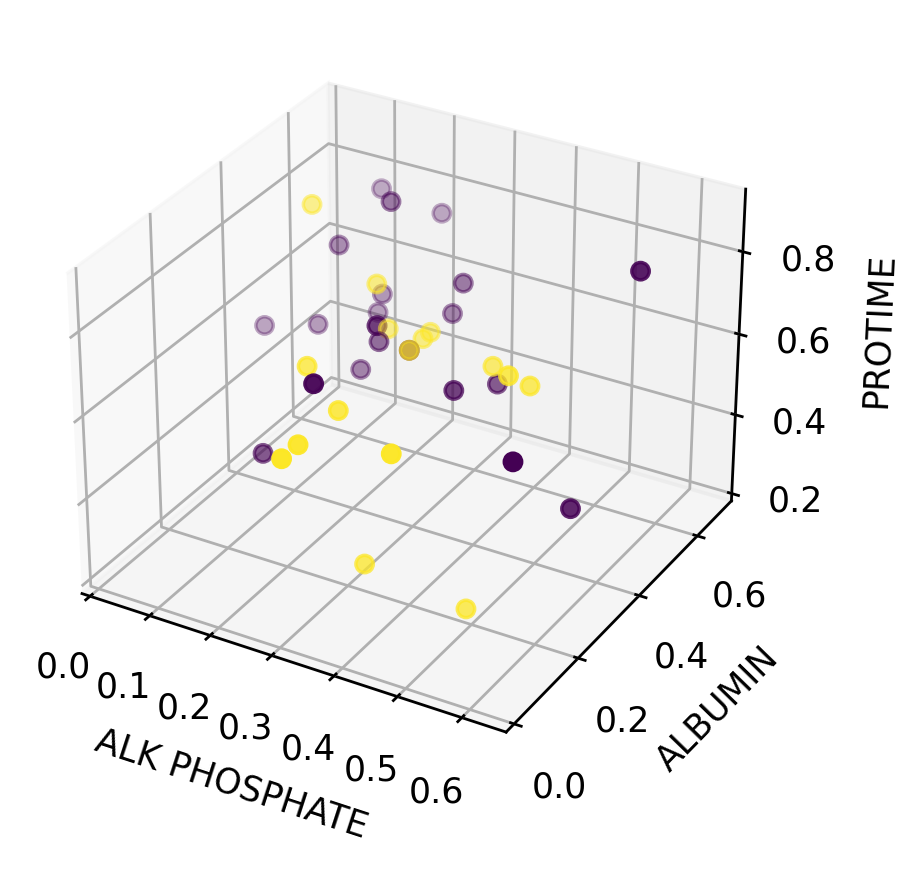

In [14]:
# График реальных классов

data_visualize(X_test,y_test)

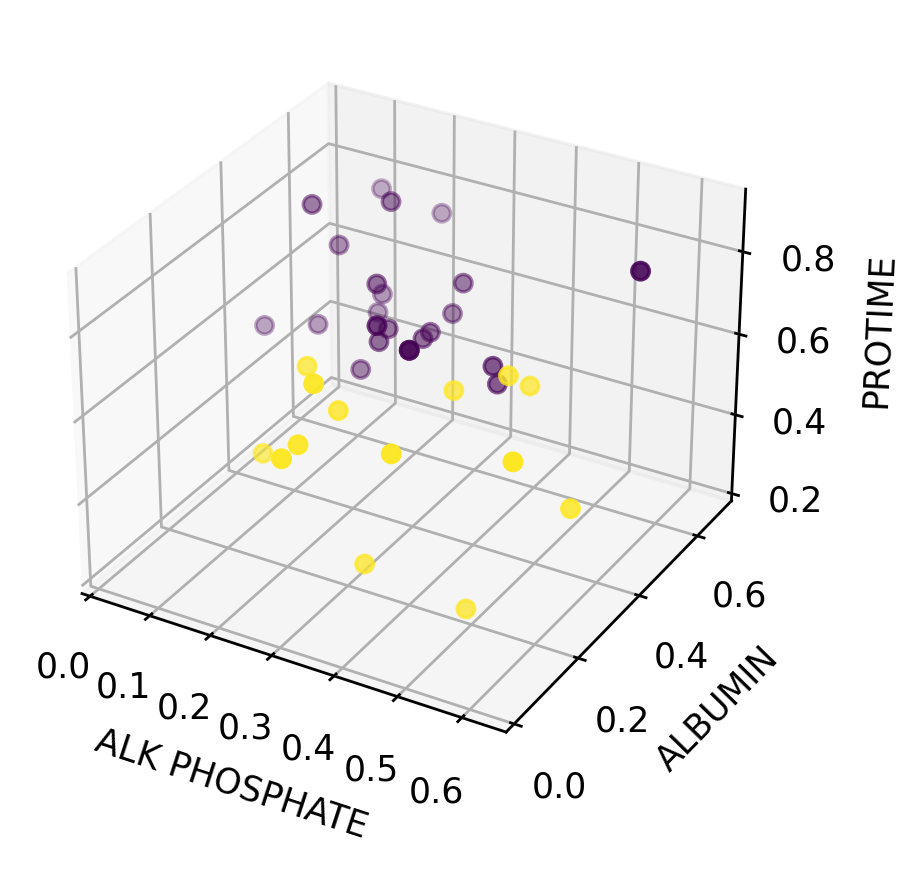

In [15]:
# График прогнозируемых классов
y_pred = nbc.predict(X_test)
data_visualize(X_test,y_pred)